In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
OS_Scan_data_total  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/OS_Scan_dataset.csv")
OS_Scan_data_total

,1.000000000000000000e+00,1.294000000000000000e+03,0.000000000000000000e+00,1.000000000000000000e+00.1,1.294000000000000000e+03.1,0.000000000000000000e+00.1,1.000000000000000000e+00.2,1.294000000000000000e+03.2,0.000000000000000000e+00.2,1.000000000000000000e+00.3,...,0.000000000000000000e+00.48,0.000000000000000000e+00.49,0.000000000000000000e+00.50,1.000000000000000000e+00.24,1.294000000000000000e+03.28,0.000000000000000000e+00.51,1.294000000000000000e+03.29,0.000000000000000000e+00.52,0.000000000000000000e+00.53,0.000000000000000000e+00.54
0,1.999871,1294.000000,2.328306e-10,1.999923,1294.000000,6.984919e-10,1.999974,1294.000000,0.000000e+00,1.999997,...,6.984919e-10,0.000000e+00,0.000000e+00,2.000000,1294.000000,0.000015,1294.000000,2.328306e-10,0.000000e+00,0.000000e+00
1,2.999324,1294.000000,0.000000e+00,2.999594,1294.000000,2.328306e-10,2.999865,1294.000000,2.328306e-10,2.999986,...,0.000000e+00,0.000000e+00,0.000000e+00,2.999999,1294.000000,0.000031,1294.000000,9.313226e-10,0.000000e+00,0.000000e+00
2,3.999272,1294.000000,2.328306e-10,3.999563,1294.000000,9.313226e-10,3.999854,1294.000000,2.328306e-10,3.999985,...,0.000000e+00,0.000000e+00,0.000000e+00,3.999999,1294.000000,0.000026,1294.000000,6.984919e-10,0.000000e+00,0.000000e+00
3,4.997597,1294.000000,2.328306e-10,4.998558,1294.000000,9.313226e-10,4.999519,1294.000000,2.328306e-10,4.999952,...,9.313226e-10,0.000000e+00,0.000000e+00,4.999995,1294.000000,0.000026,1294.000000,6.984919e-10,0.000000e+00,0.000000e+00
4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,9.313226e-10,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000,1295.390289,6.984919e-10,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697845,55.113544,1255.595820,2.411756e+04,94.149478,1248.122129,3.155234e+04,296.671341,1240.619257,4.002142e+04,3048.476828,...,4.135195e+04,7.129888e-12,8.220905e-09,30554.773785,1239.968489,203.039849,1241.419290,4.122518e+04,-3.829889e-12,-9.323921e-09
1697846,56.089276,1256.280518,2.371340e+04,95.124602,1248.604421,3.124254e+04,297.645211,1240.798601,3.989650e+04,3049.449976,...,4.133935e+04,7.123007e-12,8.214223e-09,30555.746871,1239.970257,203.036762,1241.421056,4.122393e+04,-3.829852e-12,-9.323973e-09
1697847,24.218101,60.000000,9.094947e-13,41.684124,60.000000,1.818989e-12,132.075127,60.000000,4.092726e-12,1360.879336,...,4.133935e+04,7.115989e-12,8.008362e-09,13525.849403,60.000000,0.000002,1241.421056,4.122393e+04,-3.829835e-12,-1.057234e-08
1697848,57.082093,1256.941311,2.332246e+04,96.117293,1249.076715,3.093871e+04,298.637587,1240.976748,3.977235e+04,3050.442165,...,4.132675e+04,7.108975e-12,8.001688e-09,30556.739044,1239.972026,203.033675,1241.422823,4.122267e+04,-3.829817e-12,-1.057245e-08


In [ ]:
OS_Scan_label_total  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/OS_Scan_labels.csv")
OS_Scan_label_total

,Unnamed: 0,x
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1697846,1697847,0
1697847,1697848,0
1697848,1697849,0
1697849,1697850,0


In [ ]:
# Drop the last row
OS_Scan_label_total = OS_Scan_label_total.drop(OS_Scan_label_total.index[-1])
OS_Scan_label_total

,Unnamed: 0,x
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1697845,1697846,0
1697846,1697847,0
1697847,1697848,0
1697848,1697849,0


In [ ]:
# Add labels as a new column to the train dataset
OS_Scan_data_total['labels'] = OS_Scan_label_total.iloc[:, 1]

# Save the updated train dataset to a new CSV file
#OS_Scan_data_total.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/merged_OS_Scan.csv', index=False)


In [ ]:
import psutil

# Get disk usage information
disk_usage = psutil.disk_usage('/')

# Print the used disk space in bytes
print("Used disk space:", disk_usage.used)

# Print the used disk space in a human-readable format
print("Used disk space:", psutil.disk_usage('/').used / (1024**3), "GB")


Used disk space: 31451136000
Used disk space: 29.291152954101562 GB


In [ ]:
# Calculate the distribution of each label
# Get the label column (assuming it is the last column)
label_column = OS_Scan_data_total.iloc[:, -1]
# Calculate the distribution of each label
label_distribution = label_column.value_counts(normalize=True)

# Print the label distribution
print(label_distribution)

0    0.961304
1    0.038696
Name: labels, dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded into the data_array
# Remove the first column from the data
feature_data = OS_Scan_data_total.iloc[:, :-1]
label_data = OS_Scan_data_total.iloc[:, -1]
#del OS_Scan_data_total
#del OS_Scan_label_total


# Calculate the index for splitting the data
split_index = 1000000 #1M for training



from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Normalize each column using RobustScaler
normalized_data = scaler.fit_transform(feature_data)

# Create a new DataFrame with the normalized values
df = pd.DataFrame(normalized_data, columns=feature_data.columns)


from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is called 'df'

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the entire DataFrame
scaler.fit(df)

# Transform the entire DataFrame with the scaler
normalized_df = pd.DataFrame(scaler.transform(df), columns=df.columns)



# Split the data into training and testing sets
X_train =  normalized_df[:split_index]
X_test =  normalized_df[split_index:]
Y_test = label_data[split_index:]


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:

del normalized_data
del OS_Scan_data_total
del feature_data



In [ ]:
# Define the autoencoder architecture with additional layers
input_dim = X_train.shape[1]
encoding_dim = 100  # Adjust the size of the encoding layer as per your requirements

input_data = keras.Input(shape=(input_dim,))
encoded = keras.layers.Dense(256, activation='relu')(input_data)
dropout_encoded = keras.layers.Dropout(0.1)(encoded)
encoded2 = keras.layers.Dense(128, activation='relu')(dropout_encoded)
dropout_encoded2 = keras.layers.Dropout(0.1)(encoded2)
encoded3 = keras.layers.Dense(64, activation='relu')(dropout_encoded2)
dropout_encoded3 = keras.layers.Dropout(0.1)(encoded3)
encoded4 = keras.layers.Dense(128, activation='relu')(dropout_encoded3)
dropout_encoded4 = keras.layers.Dropout(0.1)(encoded4)
encoded5 = keras.layers.Dense(256, activation='relu')(dropout_encoded4)
dropout_encoded5 = keras.layers.Dropout(0.1)(encoded5)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(dropout_encoded5)

autoencoder = keras.Model(input_data, decoded)

from tensorflow.keras.optimizers import Adam

# Assuming 'autoencoder' is the model you want to compile
learning_rate = 0.001  # Learning rate value

# Create an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimizer, loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=5000)


# Save the model
model_path = "/content/drive/MyDrive/Colab Notebooks/xNIDS/Models/kitsune.h5"
autoencoder.save(model_path)
print("Model saved.")

# Load the model
loaded_model = keras.models.load_model(model_path)
print("Model loaded.")



# Reconstruction
reconstructed_data = autoencoder.predict(X_test)

# Compute reconstruction error
reconstruction_error = np.mean(np.square(X_test - reconstructed_data), axis=1)

# Set the threshold for anomaly detection
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)

# Classify anomalies
predicted_labels = (reconstruction_error > threshold).astype(int)

# Evaluate performance
accuracy = np.mean(predicted_labels == Y_test)

print(f"Accuracy: {accuracy}")


Epoch 1/10
200/200 [==============================] - 6s 22ms/step - loss: 0.0151
Epoch 2/10
200/200 [==============================] - 4s 21ms/step - loss: 8.2681e-04
Epoch 3/10
200/200 [==============================] - 4s 21ms/step - loss: 4.3996e-04
Epoch 4/10
200/200 [==============================] - 4s 21ms/step - loss: 2.9829e-04
Epoch 5/10
200/200 [==============================] - 4s 21ms/step - loss: 2.3422e-04
Epoch 6/10
200/200 [==============================] - 4s 21ms/step - loss: 1.9950e-04
Epoch 7/10
200/200 [==============================] - 4s 21ms/step - loss: 1.7550e-04
Epoch 8/10
200/200 [==============================] - 4s 20ms/step - loss: 1.5796e-04
Epoch 9/10
200/200 [==============================] - 4s 20ms/step - loss: 1.4303e-04
Epoch 10/10
200/200 [==============================] - 4s 21ms/step - loss: 1.3226e-04
Model saved.
Model loaded.
21808/21808 [==============================] - 29s 1ms/step
Accuracy: 0.9052317833345275


In [ ]:


# Reconstruction
reconstructed_data1 = autoencoder.predict(normalized_df)

# Compute reconstruction error
reconstruction_error1 = np.mean(np.square(normalized_df - reconstructed_data1), axis=1)

53058/53058 [==============================] - 73s 1ms/step


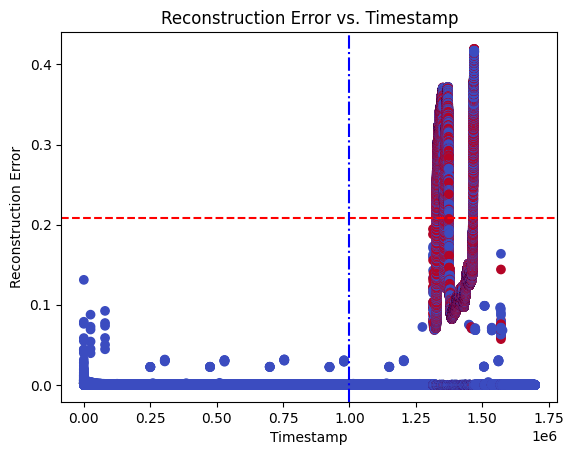

In [ ]:
# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(OS_Scan_label_total.index, reconstruction_error1, c=label_data, cmap='coolwarm')

# Format x-axis as dates

# Set axis labels and title
ax.set_xlabel('Timestamp')
# Set y-axis to log scale with negative values
# Set y-axis to log scale
#ax.set_yscale('log')
ax.set_ylabel('Reconstruction Error')
ax.set_title('Reconstruction Error vs. Timestamp')
# Plot the horizontal line on the Axes object
ax.axhline(y=threshold, color='red', linestyle='--')
# Plot the vertical line
ax.axvline(x =1000000, color='blue', linestyle='-.')
# Show the plot
plt.show()

In [ ]:
import psutil

# Get disk usage information
disk_usage = psutil.disk_usage('/')

# Print the used disk space in bytes
print("Used disk space:", disk_usage.used)

# Print the used disk space in a human-readable format
print("Used disk space:", psutil.disk_usage('/').used / (1024**3), "GB")

Used disk space: 31454363648
Used disk space: 29.294158935546875 GB


In [ ]:
# Prepare data for explanations
threshold

0.20776055640832747

In [ ]:
predicted_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Y_test = label_data[split_index:]

In [ ]:
kitsune_false_positives = []  # Store indices of false positives
kitsune_false_negatives = []  # Store indices of false negatives
kitsune_true_positives = []  # Store indices of false negatives
for i in range(len(reconstruction_error)):
    if predicted_labels[i] != Y_test.values[i]:
        if predicted_labels[i] == 1:  # False positive
            kitsune_false_positives.append(i)
        else:  # False negative
            kitsune_false_negatives.append(i)
    else:
        if predicted_labels[i] == 1:  # True positive
            kitsune_true_positives.append(i)

In [ ]:
kfn = kitsune_false_negatives[39000]
kfn

456016

In [ ]:
reconstruction_error[kfn]

0.14151900999030606

In [ ]:
Y_test.iloc[kfn]

1

In [ ]:
label_data.iloc[1000000+kfn]

1

In [ ]:
kitsune_selected_fn_rows =  pd.DataFrame(X_test[kfn-10:kfn])
kitsune_selected_fn_rows.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kitsune_selected_fn_rows.csv', index=False)
kitsune_selected_fn_rows

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.280255,2.220446e-16,0.000000e+00,0.370403,1.110223e-16,2.775558e-17,0.478197,7.771561e-16,6.938894e-17,0.914859,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
1,0.279995,2.220446e-16,0.000000e+00,0.370197,1.110223e-16,2.775558e-17,0.478106,3.330669e-16,4.163336e-17,0.914820,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
2,0.280599,2.220446e-16,0.000000e+00,0.370676,1.110223e-16,2.775558e-17,0.478316,7.771561e-16,6.938894e-17,0.914888,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
3,0.280338,2.220446e-16,1.387779e-17,0.370469,1.110223e-16,2.775558e-17,0.478224,3.330669e-16,4.163336e-17,0.914849,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
4,0.280961,2.220446e-16,0.000000e+00,0.370963,1.110223e-16,0.000000e+00,0.478440,7.771561e-16,6.938894e-17,0.914918,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
5,0.280668,2.220446e-16,0.000000e+00,0.370730,1.110223e-16,2.775558e-17,0.478338,3.330669e-16,4.163336e-17,0.914877,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
6,0.281028,2.220446e-16,1.387779e-17,0.371015,1.110223e-16,2.775558e-17,0.478462,3.330669e-16,4.163336e-17,0.914908,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
7,0.277973,2.220446e-16,0.000000e+00,0.368591,1.110223e-16,0.000000e+00,0.477419,7.771561e-16,6.938894e-17,0.914729,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
8,0.278372,2.220446e-16,0.000000e+00,0.368907,1.110223e-16,0.000000e+00,0.477556,7.771561e-16,6.938894e-17,0.914762,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
9,0.278685,2.220446e-16,0.000000e+00,0.369154,1.110223e-16,0.000000e+00,0.477664,7.771561e-16,6.938894e-17,0.914789,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07


In [ ]:
ktp = kitsune_true_positives[20000]
ktp

373907

In [ ]:
reconstruction_error[ktp]

0.26677650458466096

In [ ]:
Y_test.iloc[ktp]

1

In [ ]:
label_data.iloc[1000000+ktp]

1

In [ ]:
kitsune_selected_tp_rows =  pd.DataFrame(X_test[ktp-10:ktp])
kitsune_selected_tp_rows.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kitsune_selected_tp_rows.csv', index=False)
kitsune_selected_tp_rows

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.442666,3.330669e-16,4.163336e-17,0.663674,1.110223e-16,6.938894e-17,0.903742,3.330669e-16,1.387779e-17,0.641692,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
1,0.444036,2.220446e-16,1.387779e-17,0.664733,0.000000e+00,6.938894e-17,0.904208,3.330669e-16,9.714451e-17,0.641867,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
2,0.442955,3.330669e-16,4.163336e-17,0.663889,1.110223e-16,6.938894e-17,0.903833,3.330669e-16,1.387779e-17,0.641722,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
3,0.443340,3.330669e-16,4.163336e-17,0.664191,1.110223e-16,6.938894e-17,0.903964,3.330669e-16,1.387779e-17,0.641755,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
4,0.443560,3.330669e-16,4.163336e-17,0.664346,1.110223e-16,6.938894e-17,0.904027,3.330669e-16,1.387779e-17,0.641783,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
5,0.443947,3.330669e-16,4.163336e-17,0.664649,1.110223e-16,4.163336e-17,0.904158,3.330669e-16,1.387779e-17,0.641816,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.018986,0.0,3.224776e-13,4.879287e-07
6,0.438538,2.220446e-16,1.387779e-17,0.659739,0.000000e+00,6.938894e-17,0.901932,3.330669e-16,9.714451e-17,0.641728,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
7,0.438922,2.220446e-16,1.387779e-17,0.660040,0.000000e+00,6.938894e-17,0.902062,3.330669e-16,9.714451e-17,0.641761,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
8,0.439319,2.220446e-16,1.387779e-17,0.660354,0.000000e+00,6.938894e-17,0.902197,3.330669e-16,9.714451e-17,0.641794,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07
9,0.439721,2.220446e-16,1.387779e-17,0.660671,0.000000e+00,6.938894e-17,0.902335,3.330669e-16,9.714451e-17,0.641828,...,0.0,2.454143e-13,3.605522e-07,0.0,8.881784e-16,0.0,0.000000,0.0,3.224776e-13,4.879287e-07


In [ ]:
len(kitsune_false_positives)

22895

In [ ]:
kfp = kitsune_false_positives[20000]
kfp

373081

In [ ]:
reconstruction_error[kfp]

0.3029833795420598

In [ ]:
kitsune_selected_fp_rows = pd.DataFrame(X_test[kfp-10:kfp])
# Save DataFrame as CSV
kitsune_selected_fp_rows.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kitsune_selected_fp_rows.csv', index=False)
kitsune_selected_fp_rows

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.013543,2.220446e-16,0.000000e+00,0.017235,1.110223e-16,0.000000e+00,0.020769,5.551115e-16,0.000000e+00,0.046192,...,0.097942,2.241525e-13,3.500776e-07,0.444109,9.992007e-16,1.299072e-08,0.901967,0.099115,4.579512e-13,5.054341e-07
1,0.518534,3.330669e-16,1.387779e-17,0.744485,0.000000e+00,6.938894e-17,0.939454,3.330669e-16,8.326673e-17,0.635112,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.000000,0.000000,3.224776e-13,4.879287e-07
2,0.518809,3.330669e-16,1.387779e-17,0.744692,0.000000e+00,6.938894e-17,0.939546,3.330669e-16,8.326673e-17,0.635142,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.000000,0.000000,3.224776e-13,4.879287e-07
3,0.518567,3.330669e-16,6.938894e-17,0.744515,0.000000e+00,6.938894e-17,0.939457,3.330669e-16,1.387779e-17,0.635064,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.018986,0.000000,3.224776e-13,4.879287e-07
4,0.519040,3.330669e-16,1.387779e-17,0.744863,0.000000e+00,6.938894e-17,0.939622,3.330669e-16,8.326673e-17,0.635171,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.000000,0.000000,3.224776e-13,4.879287e-07
5,0.518864,3.330669e-16,6.938894e-17,0.744741,0.000000e+00,6.938894e-17,0.939556,3.330669e-16,1.387779e-17,0.635095,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.018986,0.000000,3.224776e-13,4.879287e-07
6,0.519419,3.330669e-16,1.387779e-17,0.745161,0.000000e+00,6.938894e-17,0.939752,3.330669e-16,8.326673e-17,0.635204,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.000000,0.000000,3.224776e-13,4.879287e-07
7,0.519710,3.330669e-16,1.387779e-17,0.745383,0.000000e+00,6.938894e-17,0.939849,3.330669e-16,8.326673e-17,0.635234,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.000000,0.000000,3.224776e-13,4.879287e-07
8,0.519126,3.330669e-16,6.938894e-17,0.744938,0.000000e+00,6.938894e-17,0.939643,3.330669e-16,1.387779e-17,0.635125,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.018986,0.000000,3.224776e-13,4.879287e-07
9,0.519373,3.330669e-16,6.938894e-17,0.745123,0.000000e+00,6.938894e-17,0.939725,3.330669e-16,1.387779e-17,0.635154,...,0.000000,2.454143e-13,3.605522e-07,0.000000,8.881784e-16,0.000000e+00,0.018986,0.000000,3.224776e-13,4.879287e-07
